In [6]:
# Importing the required Libraries
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import itertools
import os
import glob
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path = "../input/tomato-leaf-disease/Tomato Leaf Diseases/Training Set"
valid_path = "../input/tomato-leaf-disease/Tomato Leaf Diseases/Validation Set"

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   vertical_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Augmenting training data for more training examples
training_set = train_datagen.flow_from_directory('../input/tomato-leaf-disease/Tomato Leaf Diseases/Training Set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [5]:
validation_set = valid_datagen.flow_from_directory('../input/tomato-leaf-disease/Tomato Leaf Diseases/Validation Set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7000 images belonging to 10 classes.


# **Using Transfer Learning (VGG16)**

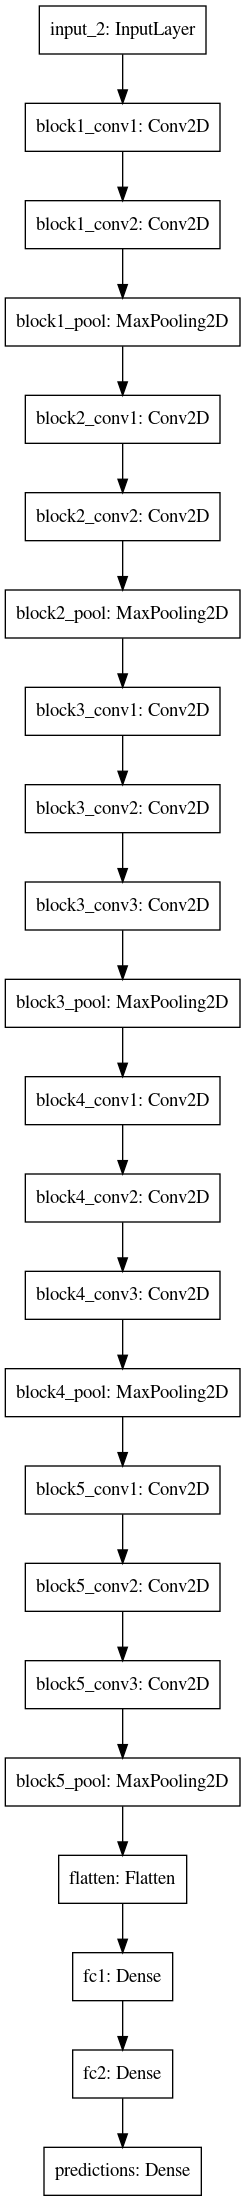

In [8]:
# Downloading the VGG16 model
vgg16_model =  tf.keras.applications.vgg16.VGG16()
plot_model(vgg16_model)

In [9]:
vggmodel = Sequential()
for layer in vgg16_model.layers[:-1]:
    vggmodel.add(layer)
vggmodel.add(Dense(units=10, activation= 'softmax'))
vggmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [10]:
vggmodel.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [11]:
model_save = ModelCheckpoint('./VGG16.h5', 
                             save_best_only = True, 
                             save_weights_only = False,
                             monitor = 'val_loss', 
                             mode = 'min', verbose = 1)
early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 10, mode = 'min', verbose = 1,
                           restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.3, 
                              patience = 2, min_delta = 0.001, 
                              mode = 'min', verbose = 1)
model = vggmodel.fit(x = training_set, validation_data=validation_set, epochs=20, callbacks = [model_save, early_stop, reduce_lr])

Epoch 1/20
313/313 [==============================] - ETA: 0s - loss: 5.6026 - accuracy: 0.2165
Epoch 00001: val_loss improved from inf to 1.65796, saving model to ./VGG16.h5
313/313 [==============================] - 226s 722ms/step - loss: 5.6026 - accuracy: 0.2165 - val_loss: 1.6580 - val_accuracy: 0.4034
Epoch 2/20
313/313 [==============================] - ETA: 0s - loss: 1.5483 - accuracy: 0.4303
Epoch 00002: val_loss improved from 1.65796 to 1.26569, saving model to ./VGG16.h5
313/313 [==============================] - 160s 511ms/step - loss: 1.5483 - accuracy: 0.4303 - val_loss: 1.2657 - val_accuracy: 0.5414
Epoch 3/20
313/313 [==============================] - ETA: 0s - loss: 1.2352 - accuracy: 0.5532
Epoch 00003: val_loss improved from 1.26569 to 1.10087, saving model to ./VGG16.h5
313/313 [==============================] - 162s 517ms/step - loss: 1.2352 - accuracy: 0.5532 - val_loss: 1.1009 - val_accuracy: 0.5887
Epoch 4/20
313/313 [==============================] - ETA: 0s 

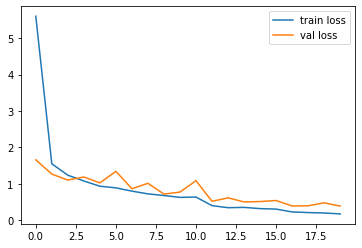

In [12]:
# Loss Plot
plt.plot(model.history['loss'], label='train loss')
plt.plot(model.history['val_loss'], label='val loss')
plt.legend()
plt.show()

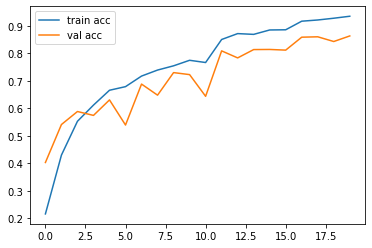

In [13]:
# accuracy plot
plt.plot(model.history['accuracy'], label='train acc')
plt.plot(model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [14]:
training_set1 = train_datagen.flow_from_directory('../input/tomato-leaf-disease/Tomato Leaf Diseases/Training Set',
                                                 target_size = (224, 224),
                                                 batch_size = 1000,
                                                 class_mode = 'categorical')
validation_set1 = valid_datagen.flow_from_directory('../input/tomato-leaf-disease/Tomato Leaf Diseases/Training Set',
                                                 target_size = (224, 224),
                                                 batch_size = 1000,
                                                 class_mode = 'categorical')
train_data, train_labels = training_set1.next()
val_data, val_labels = validation_set1.next()
test_data, val_data, test_labels, val_labels = train_test_split(val_data, val_labels, test_size = 0.5, random_state=42)

Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [15]:
print(len(train_data))
print(len(val_data))
print(len(test_data))

1000
500
500


In [16]:
train_scores = vggmodel.evaluate(train_data, train_labels)
print("Train Accuracy: %.2f%%"%(train_scores[1] * 100))
val_scores = vggmodel.evaluate(val_data, val_labels)
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
test_scores = vggmodel.evaluate(test_data, test_labels)
print("Test Accuracy: %.2f%%"%(test_scores[1] * 100))

32/32 [==============================] - 2s 71ms/step - loss: 0.1548 - accuracy: 0.9420
Train Accuracy: 94.20%
16/16 [==============================] - 1s 93ms/step - loss: 0.2789 - accuracy: 0.9020
Validation Accuracy: 90.20%
16/16 [==============================] - 1s 61ms/step - loss: 0.2747 - accuracy: 0.9120
Test Accuracy: 91.20%


In [20]:
y_pred_test=vggmodel.predict(test_data).argmax(axis=1)
print(y_pred_test)

[2 9 1 1 4 3 8 5 1 8 3 6 2 4 9 1 3 3 0 7 9 3 8 3 1 5 8 0 9 6 5 6 5 9 8 7 3
 8 6 7 0 9 4 6 9 2 3 9 0 7 0 4 1 5 3 6 9 7 2 3 3 5 7 2 0 1 7 6 9 6 9 3 1 4
 8 0 9 3 7 4 8 9 3 3 5 2 2 3 8 2 9 6 9 5 8 7 7 3 4 4 6 8 2 1 7 6 2 7 8 0 7
 2 5 6 6 3 4 9 8 4 7 6 9 5 6 0 4 8 0 8 9 6 6 1 3 5 4 2 2 2 7 6 3 7 7 1 7 1
 7 0 1 1 2 5 1 0 0 9 3 7 3 9 9 1 2 6 3 3 5 8 8 7 7 8 2 3 0 7 4 6 0 3 4 7 7
 5 6 7 0 6 2 8 8 5 2 6 9 4 5 4 3 3 1 2 0 1 3 1 1 5 5 8 3 7 9 5 9 8 7 6 3 5
 9 3 9 6 4 0 3 2 8 0 9 9 7 6 5 2 7 6 6 1 2 4 2 2 0 1 5 7 6 7 5 3 4 9 4 4 5
 8 9 2 2 8 1 9 6 3 0 3 2 4 2 3 6 2 1 0 9 6 0 4 2 0 5 0 1 6 1 1 2 4 4 1 5 3
 1 6 3 5 8 7 1 4 1 0 5 9 4 2 3 0 2 6 2 8 9 1 4 1 7 4 1 0 9 7 0 5 7 7 5 4 3
 3 9 1 6 7 9 0 9 8 1 7 3 9 6 0 4 6 1 3 6 1 5 4 6 1 8 1 1 5 1 3 5 7 7 2 8 4
 7 7 0 9 4 4 7 0 8 0 6 8 7 8 6 9 3 7 9 4 1 3 7 2 2 9 2 3 3 8 9 5 6 1 5 9 6
 9 2 9 6 1 0 5 3 8 8 6 5 0 7 9 9 4 1 3 0 2 8 1 5 1 0 4 8 6 4 7 6 9 6 3 7 6
 4 7 1 6 2 7 0 8 0 9 1 7 6 6 8 6 1 1 9 1 7 6 3 5 3 9 7 8 4 5 8 4 9 5 6 5 5
 9 1 2 6 2 5 7 4 7 2 9 5 

In [17]:
#Predicting the test data

pred_labels = vggmodel.predict(test_data)
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.87      0.94      0.91        51
           2       0.89      0.77      0.83        53
           3       0.93      0.94      0.94        54
           4       0.81      0.92      0.86        38
           5       0.91      0.84      0.87        50
           6       0.89      0.91      0.90        56
           7       1.00      0.89      0.94        65
           8       1.00      1.00      1.00        44
           9       0.88      1.00      0.93        49

   micro avg       0.91      0.91      0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500
 samples avg       0.91      0.91      0.91       500



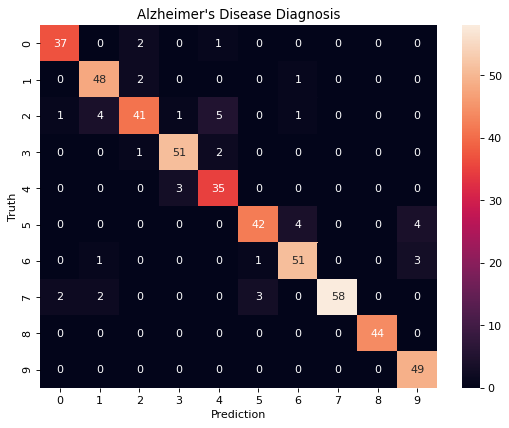

In [18]:
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_labels, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, annot=True, fmt='d')

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [19]:
# Saving the model as h5 file
vggmodel.save("vggmodel.h5")